In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Public modules
import os
import wfdb
import importlib
import numpy as np

# Custom modules
import preprocessing_utils

In [ ]:
# Explicit reloading of modules
importlib.reload(preprocessing_utils)

In [4]:
test_file_path = "data_original/mitdb/111"
test_file_name = test_file_path.split("/")[-1]
test_database = test_file_path.rsplit("/", 2)[-2]

In [5]:
record = wfdb.rdrecord(test_file_path)
annotations = wfdb.rdann(test_file_path, "atr")

In [ ]:
#wfdb.plot_wfdb(record, title=test_file_name + " from " + test_database, ecg_grids='all', annotation=annotations)

In [ ]:
record.__dict__

In [ ]:
wfdb.show_ann_labels()

In [6]:
fmt = record.fmt
fs_target = 200

In [41]:
record.fs

360

In [7]:
len(record.p_signal)

650000

In [8]:
signal, annotations = preprocessing_utils.resample_record_and_annotations(record, annotations, fs_target)
#signal, annotations = preprocessing_utils.normalize_signal_and_center(signal), annotations

#signal = preprocessing_utils.remove_noise_convolution(signal)
#signal = preprocessing_utils.cutoff_freqs_fir_filter(signal)
#signal = preprocessing_utils.remove_baseline_wander_wavelets(signal)

In [11]:
len(signal)

361111

In [58]:
test_target_path = "data_processed/"

In [82]:
wfdb.wrsamp(record_name=test_file_name + "_processed", fs=fs_target, units=record.units,
            sig_name=['ECG CH1/', 'ECG CH2/'], p_signal=signal, fmt=fmt,
            write_dir=test_target_path)

wfdb.wrann(test_file_name + "_processed", extension='atr', sample=annotations.sample,
           symbol=annotations.symbol, fs=fs_target,
           write_dir=test_target_path)

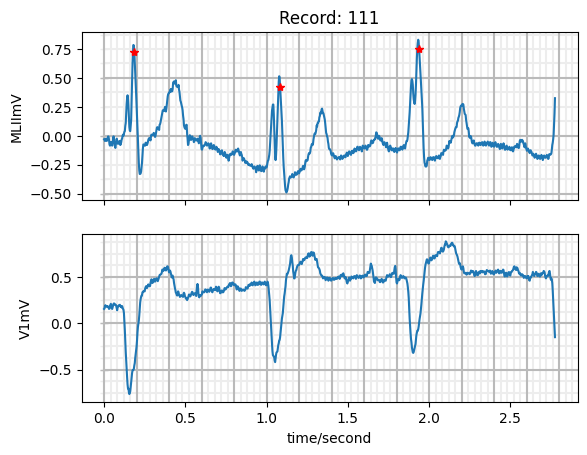

In [74]:
record = wfdb.rdrecord(test_file_path, sampfrom=50000, sampto=51000)
annotations = wfdb.rdann(test_file_path, "atr", sampfrom=50000, sampto=51000, shift_samps=True)
wfdb.plot_wfdb(record, annotation=annotations, ecg_grids='all')

In [53]:
test_processed_path = "data_processed/111_processed"

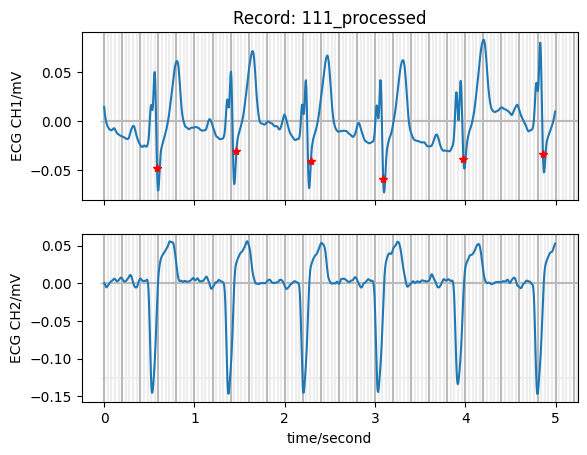

In [83]:
tested_record = wfdb.rdrecord(test_processed_path, sampfrom=50000, sampto=51000)
tested_annotations = wfdb.rdann(test_processed_path, "atr", sampfrom=50000, sampto=51000, shift_samps=True)
wfdb.plot_wfdb(tested_record, annotation=tested_annotations, ecg_grids='all')